In [1]:
import sch_model
import sch_utils
import pandas as pd
import config
from schnetpack.datasets import AtomsData
import schnetpack as spk
import torch
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from scipy.stats import spearmanr
from sklearn.metrics import mean_absolute_error
import schnetpack.atomistic as atm
import schnetpack.representation as rep
import schnetpack
import torch.nn as nn

RDKit WARNING: [15:03:58] Enabling RDKit 2019.09.1 jupyter extensions
/share/apps/python/anaconda3.2019.3/lib/python3.7/site-packages/dask/config.py:168: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  data = yaml.load(f.read()) or {}


In [2]:
# load the model
device = torch.device("cuda")
model = sch_model.model
model = model.to(device)
model.load_state_dict(torch.load(config.best_model))

<All keys matched successfully>

In [3]:
# load data
train = AtomsData(config.data_dir+'schtrain.db', available_properties=['sol'])
val = AtomsData(config.data_dir+'schval.db', available_properties=['sol'])
test = AtomsData(config.data_dir+'schtest.db', available_properties=['sol'])

train_loader = spk.AtomsLoader(train, batch_size=config.batch_size, shuffle=False, drop_last=True)
val_loader = spk.AtomsLoader(val, batch_size=config.batch_size, shuffle=False, drop_last=True)
test_loader = spk.AtomsLoader(test, batch_size=config.batch_size, shuffle=False, drop_last=True)

train results
r2: 0.7768
sp: 0.8849
rmse: 1.0415
mae: 0.7456


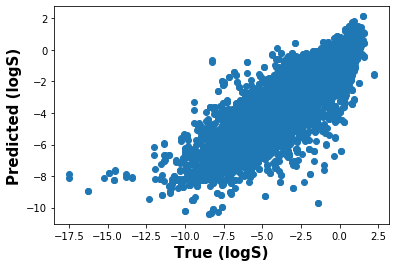

val results
r2: 0.7779
sp: 0.8809
rmse: 1.0331
mae: 0.7533


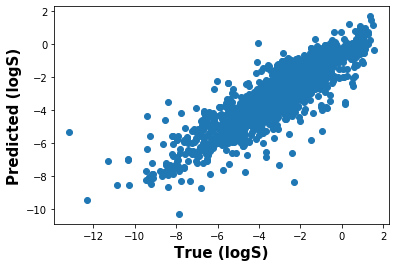

test results
r2: 0.7576
sp: 0.8683
rmse: 1.0923
mae: 0.8004


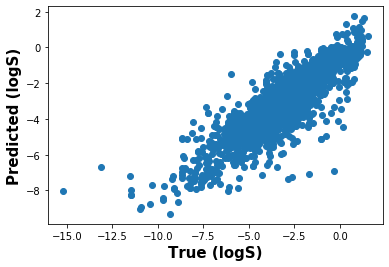

In [4]:
# make predictions
sch_utils.get_results("train", train_loader, model, device)
sch_utils.get_results("val", val_loader, model, device)
sch_utils.get_results("test", test_loader, model, device)